# Youtube Trending Video Analytics

### IMPORTING LIBRARY

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

DATASET LINK- https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv

## DATA CLEANING AND STANDARDIZATION

In [2]:
# Define the data directory path
data_path = '/content/drive/MyDrive/raw_youtube_regions'

In [3]:
# Create an empty list to hold all dataframes
df_list = []

In [4]:
# List CSV files from different regions
files = [f for f in os.listdir('/content/drive/MyDrive/raw_youtube_regions') if f.endswith('.csv')]

# Loop through each file
for file in files:
    region = file[:2].upper()  # 'USvideos.csv' -> 'US'
    df = pd.read_csv(os.path.join('/content/drive/MyDrive/raw_youtube_regions', file), encoding='latin-1')

    # Add a 'region' column
    df['region'] = region

    # Standardize column names (lowercase and underscores)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Parse the dates
    if 'trending_date' in df.columns:
            df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')
    if 'publish_time' in df.columns:
            df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

    # Remove Duplicate
    df.drop_duplicates(inplace=True)

    # Append the processed dataframe to the list
    df_list.append(df)

In [5]:
# Add a 'region' column
df['region'] = region

In [6]:
# Standardize column names (lowercase and underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

## PARSE THE DATES

In [7]:
if 'trending_date' in df.columns:
        df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')
if 'publish_time' in df.columns:
        df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

### Remove Duplicate

In [8]:
df.drop_duplicates(inplace=True)

## Combine all datasets

In [9]:
cdf = pd.concat(df_list, ignore_index=True)

In [10]:
cdf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [11]:
cdf.shape

(363372, 17)

In [12]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363372 entries, 0 to 363371
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                363372 non-null  object             
 1   trending_date           363372 non-null  datetime64[ns]     
 2   title                   363372 non-null  object             
 3   channel_title           363372 non-null  object             
 4   category_id             363372 non-null  int64              
 5   publish_time            363372 non-null  datetime64[ns, UTC]
 6   tags                    363372 non-null  object             
 7   views                   363372 non-null  int64              
 8   likes                   363372 non-null  int64              
 9   dislikes                363372 non-null  int64              
 10  comment_count           363372 non-null  int64              
 11  thumbnail_link          36

In [13]:
cdf.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


DROPPING THE DESCRIPTION COLUMN AS IT IS NOT ESSENTIAL FOR  ANALYSIS

In [14]:
cdf.drop(['thumbnail_link', 'dislikes', 'description', 'ratings_disabled'], axis=1, inplace=True)

<Axes: >

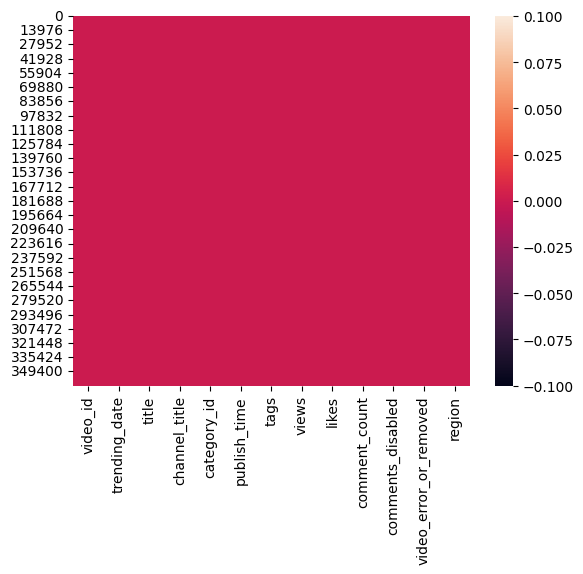

In [15]:
sns.heatmap(cdf.isnull())

In [16]:
cdf.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
comment_count,0


In [18]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'comment_count',
       'comments_disabled', 'video_error_or_removed', 'region'],
      dtype='object')

In [19]:
cdf['trending_year'] = cdf['trending_date'].dt.year
cdf['trending_year'].value_counts()

,count
trending_year,
2018,279135
2017,84237


In [20]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'comment_count',
       'comments_disabled', 'video_error_or_removed', 'region',
       'trending_year'],
      dtype='object')

In [22]:
data=pd.read_csv('/content/categoryid-title.csv')

In [23]:
data.head()

,category_id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


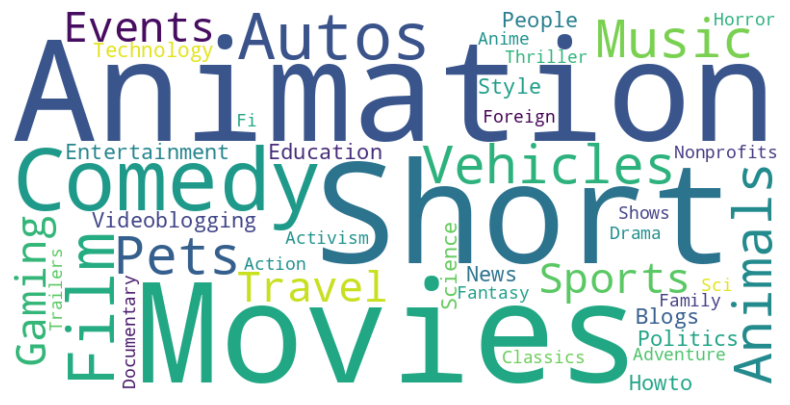

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tags into a single string, handling potential non-string values
all_title = ' '.join(data['title'].dropna().astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_title)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This are all the data in data table

In [29]:
from collections import Counter

title_words = list(cdf["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 111970),
 ('|', 104820),
 ('2018', 26831),
 ('The', 22177),
 ('de', 20641),
 ('&', 14896),
 ('a', 10771),
 ('the', 10671),
 ('/', 10479),
 ('Episode', 9645),
 ('in', 9206),
 ('A', 9067),
 ('Video)', 8438),
 ('of', 8379),
 ('2017', 8298),
 ('2', 7890),
 ('to', 7647),
 ('Ð', 7633),
 ('(Official', 7485),
 ('DE', 7395),
 ('and', 7335),
 ('Trailer', 7284),
 ('!', 7188),
 ('vs', 7136),
 ('Ù', 7080)]

Most common title symbols are - , | , & , / indicates that this symbols are used between two sentence to signify it's importance.

Trailer, Viddeo, Official, 2018 are some of the frequently occuring words

## Trending videos and their publishing time

In [30]:
cdf['publishing_day'] = cdf['publish_time'].dt.day_name()
cdf['publishing_hour'] = cdf['publish_time'].dt.hour
display(cdf[['publish_time', 'publishing_day', 'publishing_hour']].head())

,publish_time,publishing_day,publishing_hour
0,2017-11-13 17:13:01+00:00,Monday,17
1,2017-11-13 07:30:00+00:00,Monday,7
2,2017-11-12 19:05:24+00:00,Sunday,19
3,2017-11-13 11:00:04+00:00,Monday,11
4,2017-11-12 18:01:41+00:00,Sunday,18


In [31]:
cdf

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,comment_count,comments_disabled,video_error_or_removed,region,trending_year,publishing_day,publishing_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,15954,False,False,US,2017,Monday,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,12703,False,False,US,2017,Monday,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,8181,False,False,US,2017,Sunday,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,2146,False,False,US,2017,Monday,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,17518,False,False,US,2017,Sunday,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363367,r63VBOagGAo,2018-06-14,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13 13:11:56+00:00,"Canal|""Oficial""|""da""|""FederaÃ§Ã£o""|""Portuguesa...",653114,65639,3826,False,False,MX,2018,Wednesday,13
363368,i7r_kMbyngk,2018-06-14,AMLO llegÃ³ con su esposa al Tercer Debate en ...,AMX,25,2018-06-13 01:15:08+00:00,"AMLO|""morena""|""polÃ­tica""|""PRI""|""PAN""|""PRD""|""L...",121674,3558,491,False,False,MX,2018,Wednesday,1
363369,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii Â¿adorable o ridÃ­...,Historias Wink,24,2018-06-13 15:08:53+00:00,"maire|""maire vs el internet""|""maire vs interne...",14067,538,90,False,False,MX,2018,Wednesday,15
363370,pAH9omNAWA4,2018-06-14,La Jefa del CampeÃ³n - CapÃ­tulo 2 Parte 3/4,Tele Time,22,2018-06-13 02:22:33+00:00,[none],22898,94,3,False,False,MX,2018,Wednesday,2


/tmp/ipython-input-1901586676.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publishing_day', y='video_count', data=day_counts, order=day_order, palette='viridis')


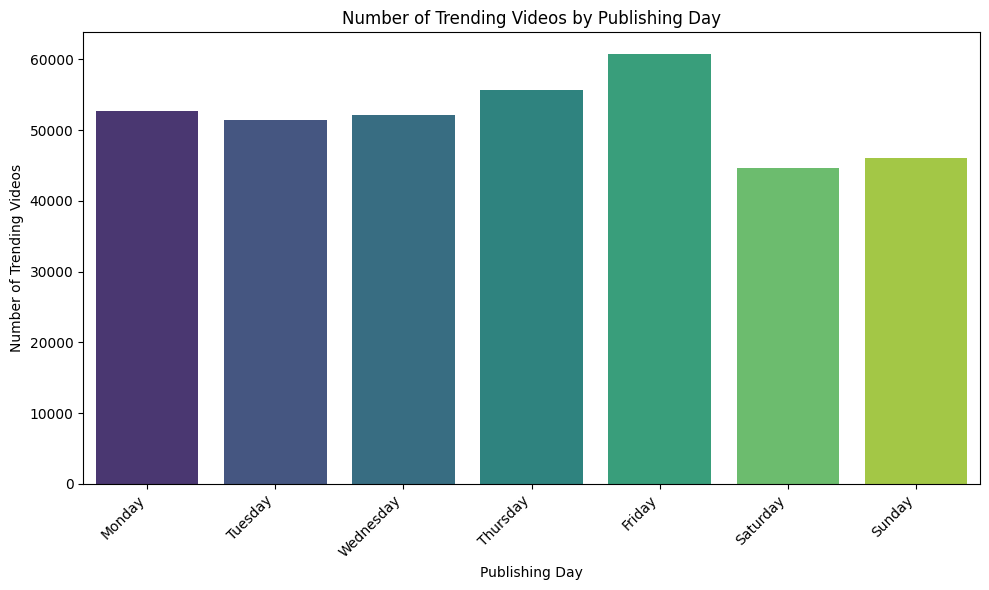

In [32]:
# Count the occurrences of each publishing day
day_counts = cdf['publishing_day'].value_counts().reset_index()
day_counts.columns = ['publishing_day', 'video_count']

# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='publishing_day', y='video_count', data=day_counts, order=day_order, palette='viridis')
plt.title('Number of Trending Videos by Publishing Day')
plt.xlabel('Publishing Day')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Friday is the best day for getting in the trending section. Thursday is the next day after friday to get viral. Monday,Tuesday,Wednesday is relatively the same. Saturday and Sunday are having the least chances of getting in trending page.

/tmp/ipython-input-223973326.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publishing_hour', y='video_count', data=hour_counts, order=hour_order, palette='viridis')


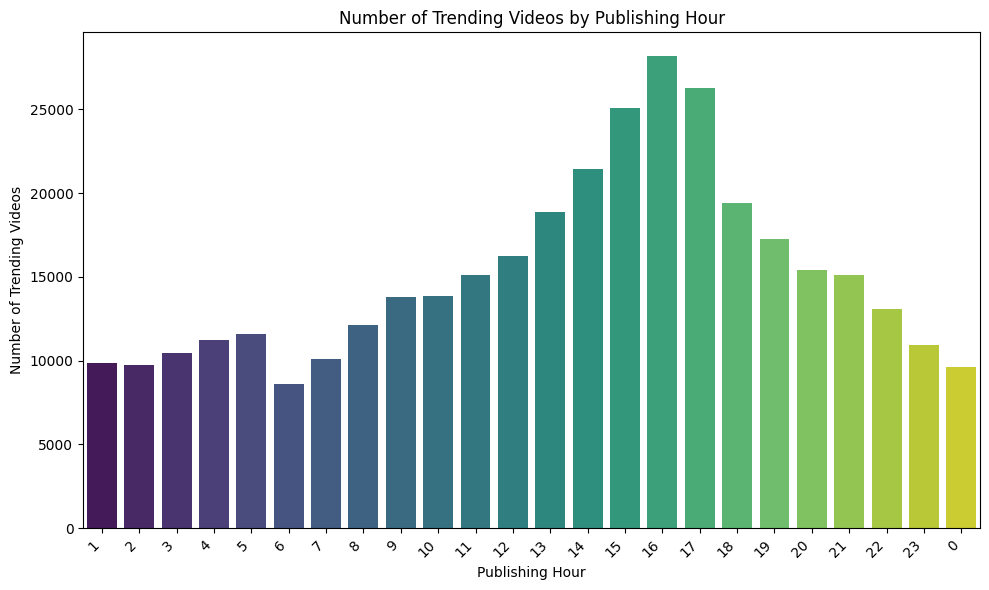

In [35]:
# Count the occurrences of each hour
hour_counts = cdf['publishing_hour'].value_counts().reset_index()
hour_counts.columns = ['publishing_hour', 'video_count']

# Define the order of the hour
hour_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='publishing_hour', y='video_count', data=hour_counts, order=hour_order, palette='viridis')
plt.title('Number of Trending Videos by Publishing Hour')
plt.xlabel('Publishing Hour')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Best Time to viral is 3 PM to 6 PM in afternoon. Avoid uploading in the early morning hour 6 AM

### TRENDING VIDEO WITH ERROR

In [37]:
cdf["video_error_or_removed"].value_counts()

,count
video_error_or_removed,
False,363128
True,244


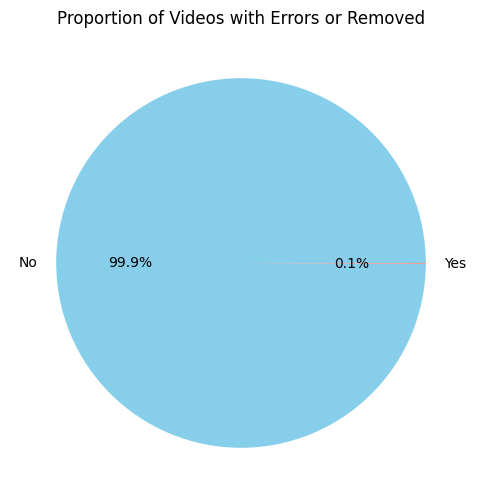

In [44]:
# Get the counts of each category in 'video_error_or_removed'
error_counts = cdf['video_error_or_removed'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(error_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Videos with Errors or Removed')
plt.show()

Not a significant value for consideration

### TRENDING VIDEO WITH COMMENT DISABLED

In [46]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'comment_count',
       'comments_disabled', 'video_error_or_removed', 'region',
       'trending_year', 'publishing_day', 'publishing_hour'],
      dtype='object')

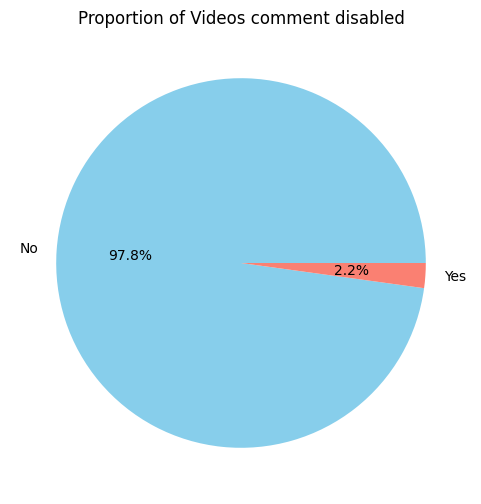

In [48]:
# Get the counts of each category in 'comments_disabled'
comments_disabled_counts = cdf['comments_disabled'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(comments_disabled_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Videos comment disabled')
plt.show()

Again not a significant value for consideration

## Channel with largest number of trending videos

In [49]:
# Count the number of trending videos per channel
channel_counts = cdf['channel_title'].value_counts()

# Find the channel with the largest number of trending videos
most_trending_channel = channel_counts.idxmax()
max_trending_videos = channel_counts.max()

print(f"The channel with the largest number of trending videos is '{most_trending_channel}' with {max_trending_videos} trending videos.")

The channel with the largest number of trending videos is 'The Late Show with Stephen Colbert' with 971 trending videos.


/tmp/ipython-input-3834727748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel_title', y='video_count', data=top_10_channels, palette='viridis')


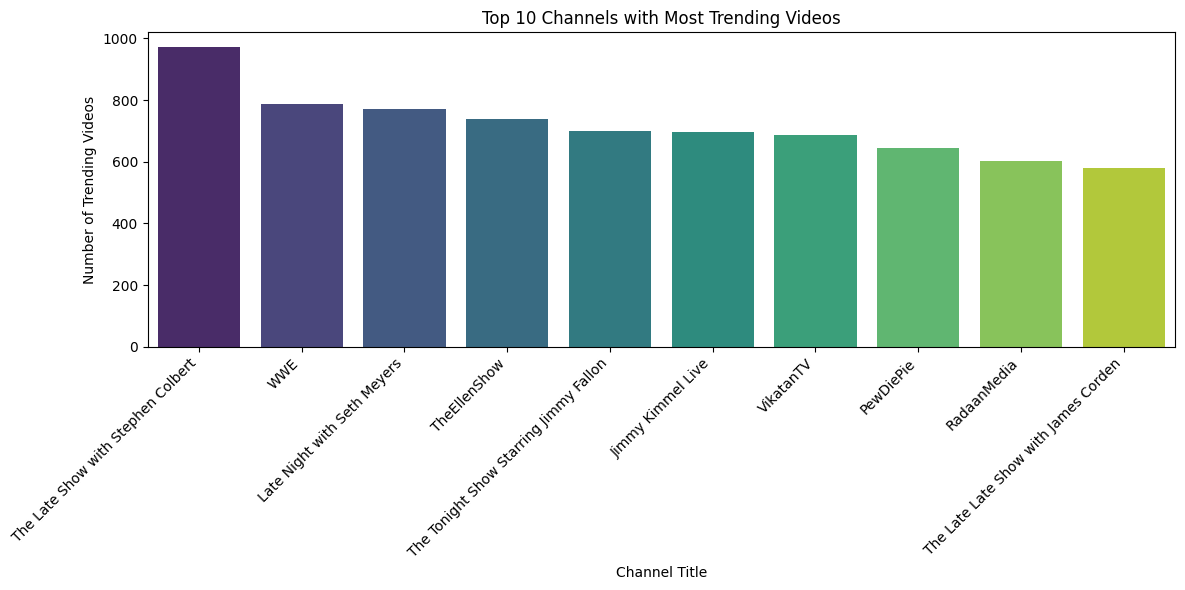

Top 10 Channels with Most Trending Videos:
                            channel_title  video_count
0      The Late Show with Stephen Colbert          971
1                                     WWE          787
2             Late Night with Seth Meyers          770
3                            TheEllenShow          737
4  The Tonight Show Starring Jimmy Fallon          700
5                       Jimmy Kimmel Live          697
6                               VikatanTV          687
7                               PewDiePie          645
8                             RadaanMedia          601
9    The Late Late Show with James Corden          579


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 channels
top_10_channels = channel_counts.head(10).reset_index()
top_10_channels.columns = ['channel_title', 'video_count']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='channel_title', y='video_count', data=top_10_channels, palette='viridis')
plt.title('Top 10 Channels with Most Trending Videos')
plt.xlabel('Channel Title')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 Channels with Most Trending Videos:")
print(top_10_channels)

# SENTIMENT ANALYSIS

## TITLE SENTIMENT ANALYSIS

In [55]:
from textblob import TextBlob

# apply sentiment on video titles
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # range from -1 to +1

# Apply sentiment analysis to titles
cdf['title_sentiment'] = cdf['title'].apply(get_sentiment)

# Optional: Add a sentiment label
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

cdf['sentiment_label'] = cdf['title_sentiment'].apply(label_sentiment)

,title,title_sentiment,sentiment_label
0,WE WANT TO TALK ABOUT OUR MARRIAGE,0.00,neutral
1,The Trump Presidency: Last Week Tonight with J...,0.00,neutral
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",0.00,neutral
3,Nickelback Lyrics: Real or Fake?,-0.75,negative
4,I Dare You: GOING BALD!?,0.00,neutral


In [56]:
cdf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,comment_count,comments_disabled,video_error_or_removed,region,trending_year,publishing_day,publishing_hour,title_sentiment,sentiment_label
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,15954,False,False,US,2017,Monday,17,0.00,neutral
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,12703,False,False,US,2017,Monday,7,0.00,neutral
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,8181,False,False,US,2017,Sunday,19,0.00,neutral
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,2146,False,False,US,2017,Monday,11,-0.75,negative
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,17518,False,False,US,2017,Sunday,18,0.00,neutral


/tmp/ipython-input-3371140934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cdf, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='viridis')


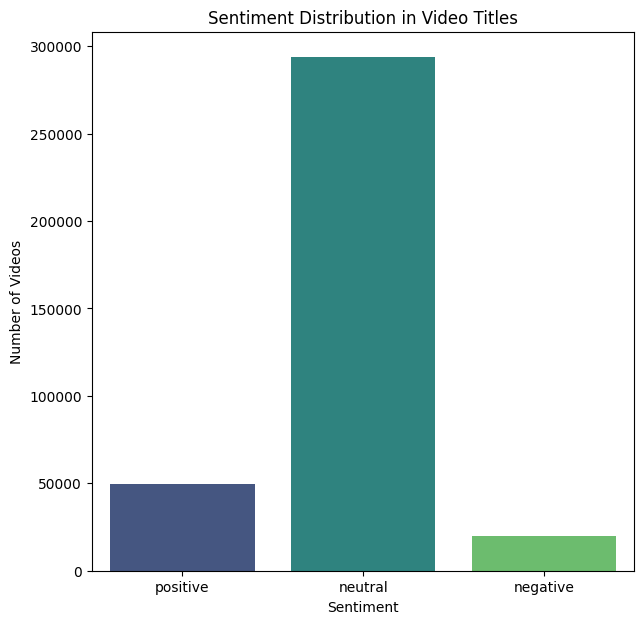

In [58]:
plt.figure(figsize=(7,7))
sns.countplot(data=cdf, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title("Sentiment Distribution in Video Titles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Videos")
plt.show()

For most video title the sentiment is neutral, positive is about 1 by 6th time lesser than neutral sentiment whereas negative is 50% lesser than the positive ones.

## TAG SENTIMENT ANALYSIS

In [59]:
# sentiment function
def get_tag_sentiment(tag_text):
    blob = TextBlob(str(tag_text))
    return blob.sentiment.polarity

# Apply function to tags column
cdf['tag_sentiment'] = cdf['tags'].apply(get_tag_sentiment)

# Label the sentiment
def label_tag_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

cdf['tag_sentiment_label'] = cdf['tag_sentiment'].apply(label_tag_sentiment)

# Preview results
cdf[['tags', 'tag_sentiment', 'tag_sentiment_label']].head()

,tags,tag_sentiment,tag_sentiment_label
0,SHANtell martin,0.000000,neutral
1,"last week tonight trump presidency|""last week ...",0.000000,neutral
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",0.111111,positive
3,"rhett and link|""gmm""|""good mythical morning""|""...",0.266667,positive
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",-0.350000,negative


/tmp/ipython-input-1093730631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cdf, x='tag_sentiment_label', order=['positive', 'neutral', 'negative'],  palette='viridis')


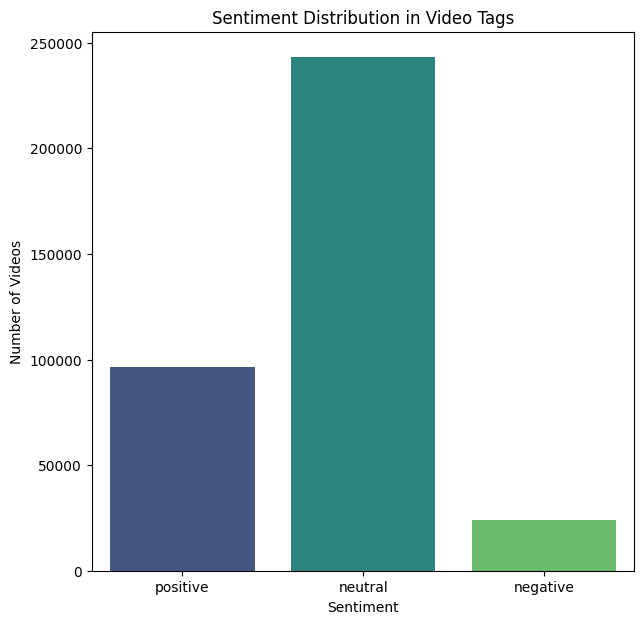

In [60]:
plt.figure(figsize=(7, 7))
sns.countplot(data=cdf, x='tag_sentiment_label', order=['positive', 'neutral', 'negative'],  palette='viridis')
plt.title("Sentiment Distribution in Video Tags")
plt.xlabel("Sentiment")
plt.ylabel("Number of Videos")
plt.show()

Neutral is the major sentiment in tags followed by positive sentiment which is 1/3 times of neutral and lastly negative that is 1/3 times of positive

In [61]:
sentiment_stats = cdf.groupby('sentiment_label')[['views', 'likes']].mean().reset_index()
print(sentiment_stats)

  sentiment_label         views         likes
0        negative  3.221194e+06  80494.413802
1         neutral  1.183638e+06  34479.279794
2        positive  1.527000e+06  44650.841136


## AVERAGE LIKES SENTIMENT ANALYSIS

/tmp/ipython-input-3418193969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_stats, x='sentiment_label', y='likes',palette='viridis')


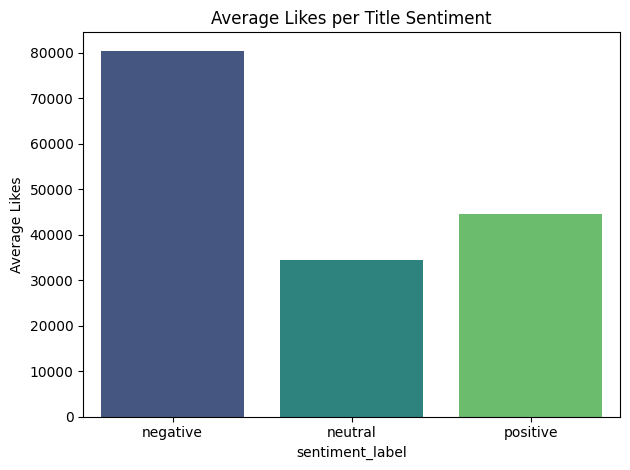

In [68]:
sns.barplot(data=sentiment_stats, x='sentiment_label', y='likes',palette='viridis')
plt.title("Average Likes per Title Sentiment")
plt.ylabel("Average Likes")
plt.tight_layout()
plt.show()

Negative sentiment is more for Average Likes followed by positive sentiment and then neutral

## AVERAGE VIEWS SENTIMENT ANALYSIS

/tmp/ipython-input-2462014086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_stats, x='sentiment_label', y='views',palette='viridis')


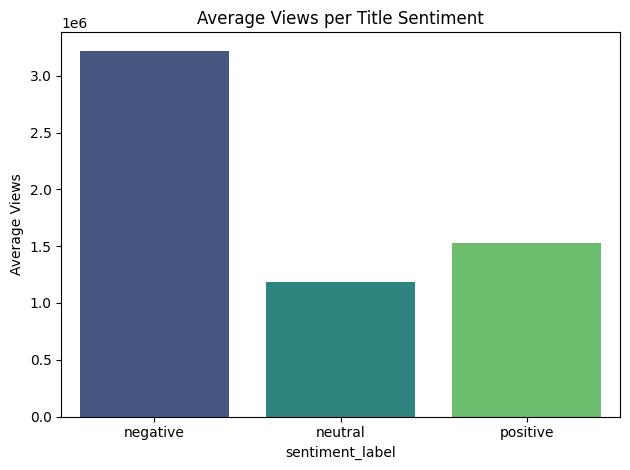

In [67]:
sns.barplot(data=sentiment_stats, x='sentiment_label', y='views',palette='viridis')
plt.title("Average Views per Title Sentiment")
plt.ylabel("Average Views")
plt.tight_layout()
plt.show()

Negative sentiment is more for Average Views followed by positive sentiment and then neutral

In [70]:
# Select only numerical columns for correlation calculation
numerical_cdf = cdf.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_cdf.corr()

# Display the correlation matrix
display(correlation_matrix)

,category_id,views,likes,comment_count,trending_year,publishing_hour,title_sentiment,tag_sentiment
category_id,1.000000,-0.134266,-0.151219,-0.069276,-0.015628,0.033745,-0.029284,-0.000319
views,-0.134266,1.000000,0.779384,0.510466,0.038568,-0.033448,-0.021894,-0.020325
likes,-0.151219,0.779384,1.000000,0.790920,0.028794,-0.019420,-0.007308,-0.007937
comment_count,-0.069276,0.510466,0.790920,1.000000,0.011649,0.000782,-0.015475,-0.009256
trending_year,-0.015628,0.038568,0.028794,0.011649,1.000000,-0.016638,-0.016176,-0.018903
publishing_hour,0.033745,-0.033448,-0.019420,0.000782,-0.016638,1.000000,-0.008181,0.018344
title_sentiment,-0.029284,-0.021894,-0.007308,-0.015475,-0.016176,-0.008181,1.000000,0.355236
tag_sentiment,-0.000319,-0.020325,-0.007937,-0.009256,-0.018903,0.018344,0.355236,1.000000


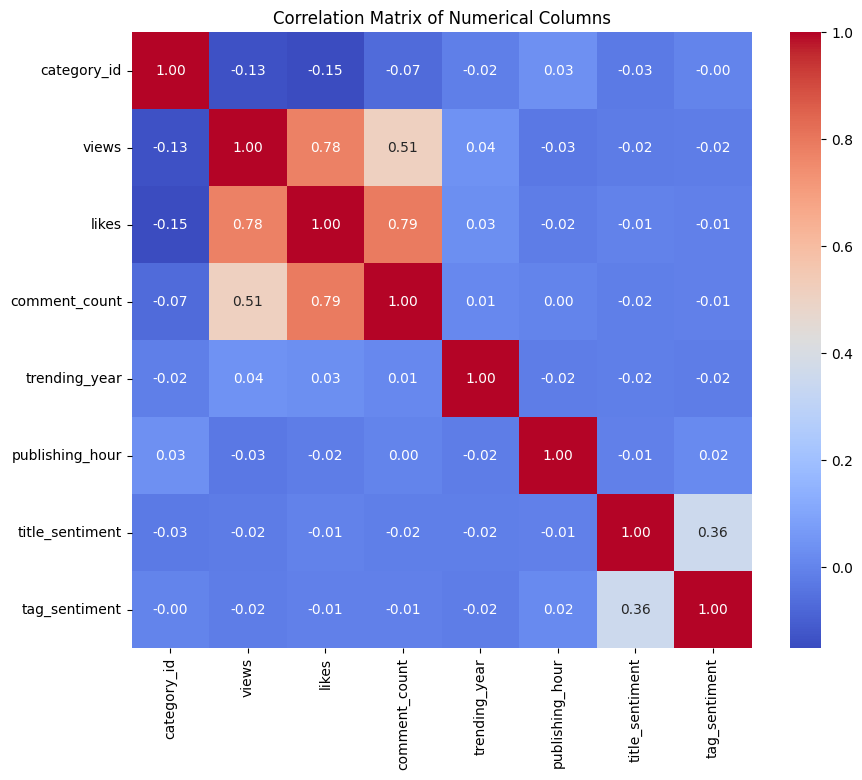

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Correlation map and table above shows that views and likes are highly positively correlated.

In [74]:
# Convert 'publish_time' to timezone-naive
cdf['publish_time'] = cdf['publish_time'].dt.tz_convert(None)

# Save the DataFrame to an Excel file
cdf.to_excel('final_yt_data.xlsx', index=False)

SAVED THE FILE FOR FURTHER VISUALIZATION IN POWER BI